# 6 - Os DAGs assombrados & O Terror Causal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from videpy import Vide

import networkx as nx
# from causalgraphicalmodels import CausalGraphicalModel

import stan
import nest_asyncio

plt.style.use('default')

plt.rcParams['axes.facecolor'] = 'lightgray'

# To DAG's
import daft
from causalgraphicalmodels import CausalGraphicalModel

In [2]:
# To running the stan in jupyter notebook
nest_asyncio.apply()

### RCode 6.1 - Pag 162

In [3]:
np.random.seed(1914)

N = 200
p = 0.1

# Não correlacionado noticiabilidade(newsworthiness) e confiabilidade(trustworthiness)
nw = np.random.normal(0, 1, N)
tw = np.random.normal(0, 1, N)

# Selecionando os 10% melhores
s = nw + tw  # Score total
q = np.quantile(s, 1-p)  # Top 10% 
selected = [ True if s_i >= q else False for s_i in s ]
print('Noticiabilidade(newsworthiness): \n\n', nw[selected], '\n\n')
print('Confiabilidade(trustworthiness):\n\n', tw[selected], '\n\n')

print('Correlação: ', np.correlate(tw[selected], nw[selected]))

Noticiabilidade(newsworthiness): 

 [ 0.82456357  1.85614543  0.85556981  1.4066898   1.6026727   1.42256068
  0.71166144  1.30222516  0.56454812  3.02039213  0.93879118  1.04202561
 -0.4640972   0.12272254  1.99579665  1.59807671  1.82853378  1.15394068
  1.48966066  1.22640255] 


Confiabilidade(trustworthiness):

 [ 1.24510334  1.29709756  2.10293057  0.66088341  1.76728533  0.64448519
  1.17598088  0.35356094  1.08805257 -0.72327249  1.31462133  1.54253157
  2.8128998   1.51862223  1.18048237  2.31948695 -0.09763283  0.87205345
  0.74979249  0.46329186] 


Correlação:  [19.93737242]


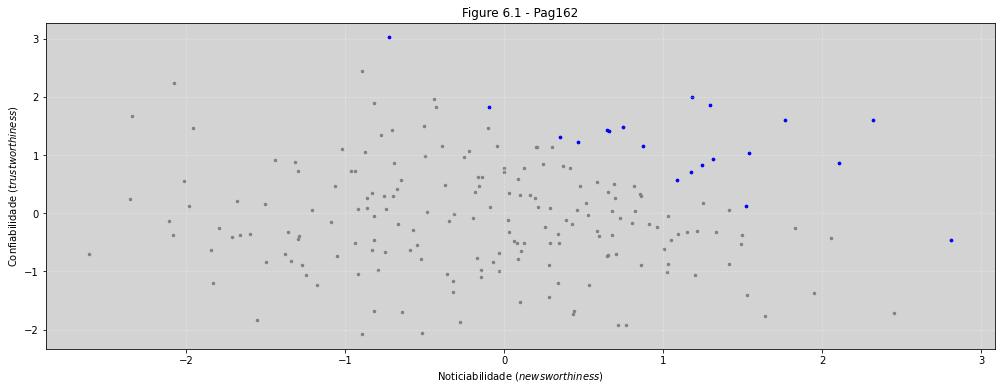

In [4]:
plt.figure(figsize=(17, 6))

plt.scatter(tw, nw, s=6, color='gray')
plt.scatter(tw[selected], nw[selected], s=7, color='blue')

plt.title('Figure 6.1 - Pag162')
plt.xlabel('Noticiabilidade ($newsworthiness$)')
plt.ylabel('Confiabilidade ($trustworthiness$)')

plt.grid(ls='--', color='white', alpha=0.3)

### RCode 6.2 - pag163


In [5]:
N = 100

np.random.seed(909)  # Teste com outras sementes

height = np.random.normal(10, 2,  N)

leg_proportion = np.random.uniform(0.4, 0.5, N)

leg_left  = np.random.left = leg_proportion * height + np.random.normal(0, 0.02, N)
leg_right = np.random.left = leg_proportion * height + np.random.normal(0, 0.02, N)


df = pd.DataFrame({'height': height, 
                   'leg_left': leg_left, 
                   'leg_right': leg_right})
df.head()

,height,leg_left,leg_right
0,8.463728,4.094675,4.078446
1,9.854070,4.776475,4.687749
2,8.668694,4.192607,4.256472
3,7.523768,3.088674,3.088206
4,9.381352,4.093217,4.048181


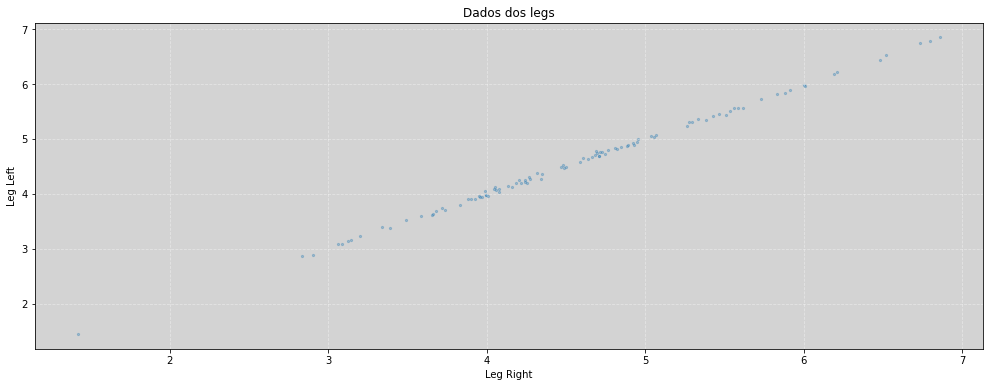

In [6]:
plt.figure(figsize=(17, 6))

plt.scatter(leg_right, leg_left, s=5, alpha=0.3)

plt.title('Dados dos legs')
plt.xlabel('Leg Right')
plt.ylabel('Leg Left')

plt.grid(ls='--', color='white', alpha=0.4)

plt.show()

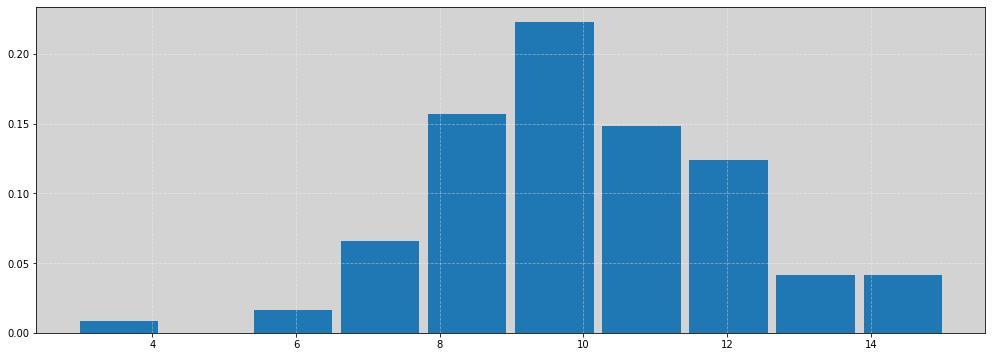

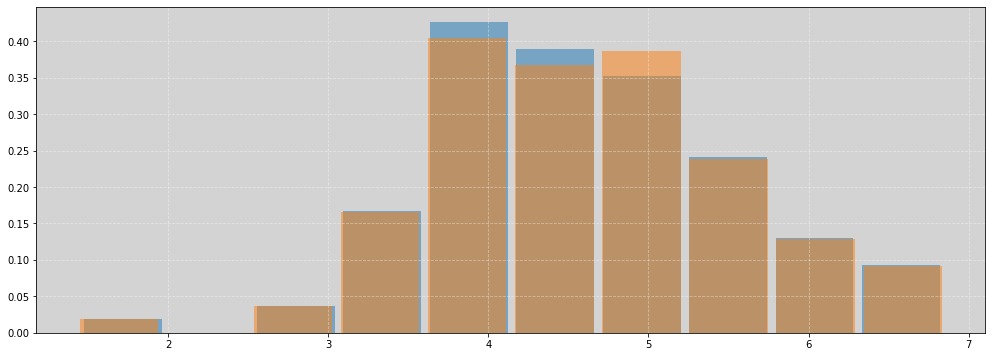

In [7]:
plt.figure(figsize=(17, 6))
plt.hist(df.height, rwidth=0.9, density=True)
plt.grid(ls='--', color='white', alpha=0.4)
plt.show()

plt.figure(figsize=(17, 6))
plt.hist(df.leg_left, rwidth=0.9, density=True, alpha=0.5)
plt.hist(df.leg_right, rwidth=0.9, density=True, alpha=0.5)

plt.grid(ls='--', color='white', alpha=0.4)
plt.show()

In [8]:
model = """
    data {
        int<lower=0> N;
        vector[N] height;
        vector[N] leg_left;
        vector[N] leg_right;
    }
    
    parameters {
        real alpha;
        real beta_left;
        real beta_right;
        real<lower=0> sigma; 
    }
    
    model {
        alpha ~ normal(10, 100);
        beta_left ~ normal(2, 10);
        beta_right ~ normal(2, 10);
        sigma ~ exponential(1);
        
        height ~ normal(alpha + beta_left * leg_left + beta_right * leg_right, sigma);
    }
"""

data = {
    'N': N,
    'height': height,
    'leg_left': leg_left,
    'leg_right': leg_right
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

alpha = samples['alpha'].flatten()
beta_left = samples['beta_left'].flatten()
beta_right = samples['beta_right'].flatten()
sigma = samples['sigma'].flatten()

Building: found in cache, done.


Messages from stanc:


Warning in '/tmp/httpstan_zd7qk9m6/model_ihjarxrx.stan', line 17, column 27: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).


Sampling:   0%


Sampling:   1% (100/8000)


Sampling:   2% (200/8000)


Sampling:   4% (300/8000)


Sampling:   5% (400/8000)


Sampling:   8% (600/8000)


Sampling:  10% (800/8000)


Sampling:  12% (1000/8000)


Sampling:  15% (1200/8000)


Sampling:  16% (1300/8000)


Sampling:  19% (1500/8000)


Sampling:  21% (1700/8000)


Sampling:  24% (1900/8000)


Sampling:  26% (2100/8000)


Sampling:  29% (2300/8000)


Sampling:  31% (2500/8000)


Sampling:  32% (2600/8000)


Sampling:  35% (2800/8000)


Sampling:  36% (2900/8000)


Sampling:  38% (3000/8000)


Sampling:  40% (3200/8000)


Sampling:  55% (4400/8000)


Sampling:  70% (5600/8000)


Sampling:  85% (6800/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 3.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.4e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 4e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.4 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.


  Adjust your expectations accordingly!


### RCode 6.4 - pag164

In [9]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,0.94,0.33,0.29,1.48
beta_left,-1.38,2.08,-5.23,2.34
beta_right,3.38,2.06,-0.21,7.31
sigma,0.66,0.05,0.58,0.74


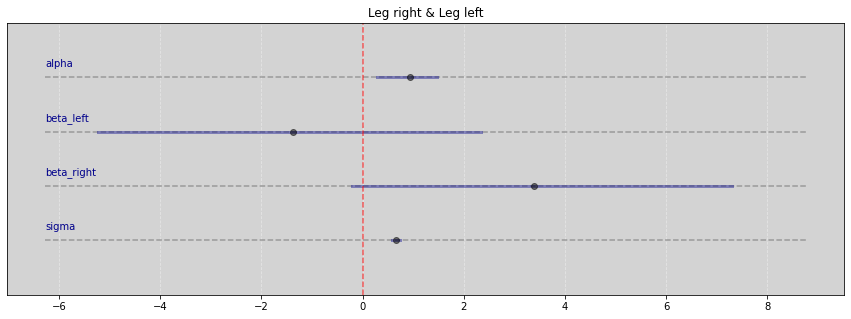

In [10]:
Vide.plot_forest(samples, title='Leg right & Leg left')

### RCode 6.5 - pag164

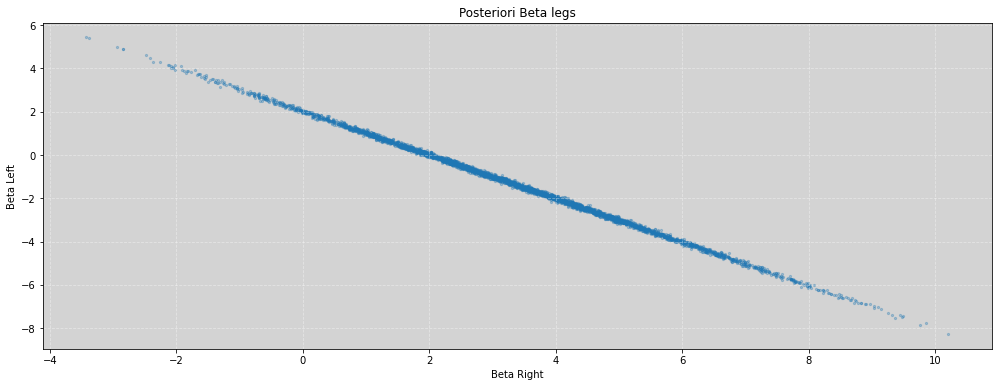

In [11]:
plt.figure(figsize=(17, 6))

plt.scatter(beta_right, beta_left, s=5, alpha=0.3)

plt.title('Posteriori Beta legs')
plt.xlabel('Beta Right')
plt.ylabel('Beta Left')

plt.grid(ls='--', color='white', alpha=0.4)

plt.show()

### RCode 6.6 - pag 165

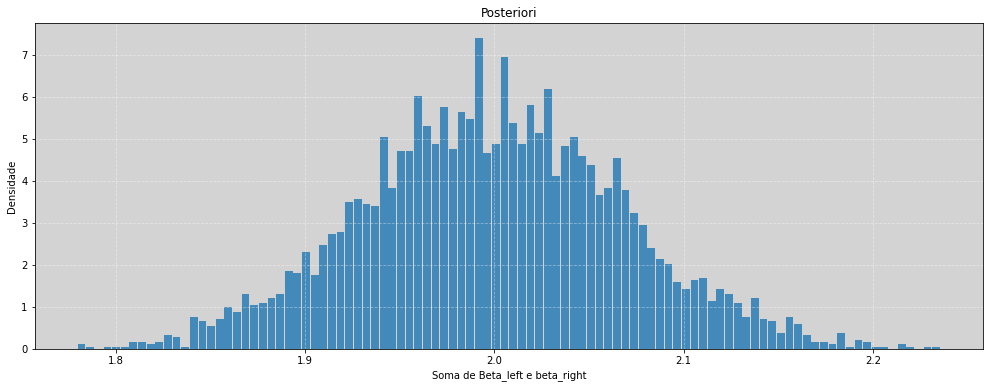

In [12]:
plt.figure(figsize=(17, 6))

plt.hist((beta_left + beta_right), density=True, alpha=0.8, bins=100, rwidth=0.9)

plt.title('Posteriori')
plt.xlabel('Soma de Beta_left e beta_right')
plt.ylabel('Densidade')

plt.grid(ls='--', color='white', alpha=0.4)

plt.show()

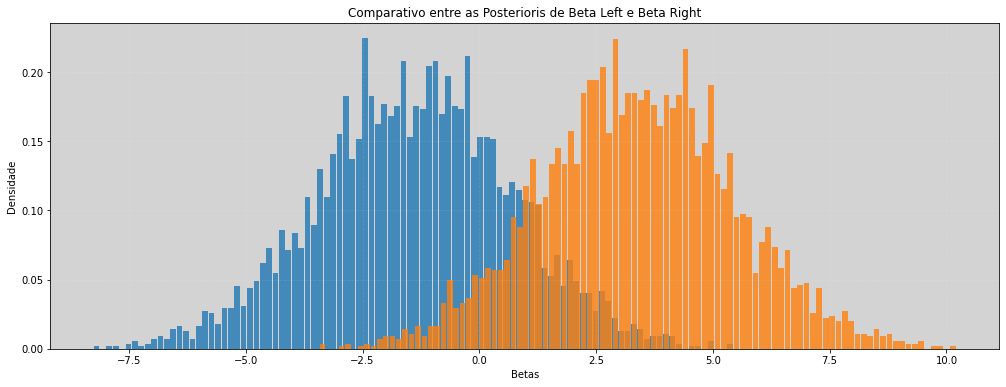

In [13]:
# Comparação com os beta indivíduais
plt.figure(figsize=(17, 6))

plt.hist(beta_left, density=True, alpha=0.8, bins=100, rwidth=0.9)  # Beta left

plt.hist(beta_right, density=True, alpha=0.8, bins=100, rwidth=0.9)  # Beta Right

plt.title('Comparativo entre as Posterioris de Beta Left e Beta Right')
plt.xlabel('Betas')
plt.ylabel('Densidade')

plt.grid(ls='--', color='white', alpha=0.1)

plt.show()

### RCode 6.7 - Pag 166

In [14]:
model = """
    data {
        int N;
        vector[N] leg_left;
        vector[N] height;
    }
    
    parameters {
        real alpha;
        real beta_left;
        real sigma;
    }
    
    model {
        alpha ~ normal(10, 100);
        beta_left ~ normal(2, 10);
        sigma ~ exponential(1);
        
        height ~ normal(alpha + beta_left * leg_left, sigma);
    }
"""

data = {
    'N': len(height),
    'leg_left': leg_left,
    'height': height,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

alpha = samples['alpha'].flatten()
beta_left = samples['beta_left'].flatten()
sigma = samples['sigma'].flatten()

Building: found in cache, done.


Messages from stanc:


Warning in '/tmp/httpstan_2q50aaut/model_yv3ltgxd.stan', line 19, column 54: A
    normal distribution is given parameter sigma as a scale parameter
    (argument 2), but sigma was not constrained to be strictly positive.
Warning in '/tmp/httpstan_2q50aaut/model_yv3ltgxd.stan', line 17, column 8: Parameter
    sigma is given a exponential distribution, which has strictly positive
    support, but sigma was not constrained to be strictly positive.
Warning in '/tmp/httpstan_2q50aaut/model_yv3ltgxd.stan', line 15, column 27: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 3.3e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 2.3e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 5.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.


  Adjust your expectations accordingly!


In [15]:
# RCode 6.7 - Continuação
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,0.83,0.33,0.28,1.43
beta_left,2.02,0.07,1.90,2.14
sigma,0.67,0.05,0.58,0.75


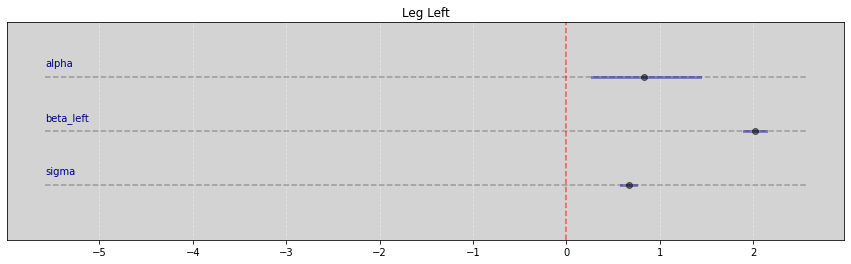

In [16]:
Vide.plot_forest(samples, title='Leg Left')

### R Code 6.8

In [17]:
df = pd.read_csv('data/milk.csv', sep=';')

df_std = df[['kcal.per.g', 'perc.fat', 'perc.lactose']].copy()

df_std['kcal.per.g'] = (df_std['kcal.per.g'] - df_std['kcal.per.g'].mean()) / df_std['kcal.per.g'].std()
df_std['perc.fat'] = (df_std['perc.fat'] - df_std['perc.fat'].mean()) / df_std['perc.fat'].std()
df_std['perc.lactose'] = (df_std['perc.lactose'] - df_std['perc.lactose'].mean()) / df_std['perc.lactose'].std()

df_std.head()

,kcal.per.g,perc.fat,perc.lactose
0,-0.940041,-1.217243,1.307262
1,-0.816126,-1.030355,1.011285
2,-1.125913,-1.391531,1.382679
3,-1.001998,-1.335535,1.586874
4,-0.258511,-0.469693,0.257115


In [18]:
# Não tem nenhum 'missing values'

df_std.isna().sum()

kcal.per.g      0
perc.fat        0
perc.lactose    0
dtype: int64

### R Code 6.9 - Pag 167

In [19]:
# kcal.per.g  regredido em perc.fat

model_kf = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(0, 0.2);
        beta ~ normal(0, 0.5);
        sigma ~ exponential(1);
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data_kf = {
    'N': len(df_std['kcal.per.g']),
    'outcome': list(df_std['kcal.per.g'].values),
    'predictor': list(df_std['perc.fat'].values),
}

posteriori_kf = stan.build(model_kf, data=data_kf)
samples_kf = posteriori_kf.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_14lf6leo/model_yliekgkx.stan', line 19, column 8 to column 58)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 1.6e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_14lf6leo/model_yliekgkx.stan', line 19, column 8 to column 58)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.


  Adjust your expectations accordingly!


In [20]:
# kcal.per.g  regredido em  perc.lactose

model_kl = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(0, 0.2);
        beta ~ normal(0, 0.5);
        sigma ~ exponential(1);
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data_kl = {
    'N': len(df_std['kcal.per.g']),
    'outcome': df_std['kcal.per.g'].values,
    'predictor': df_std['perc.lactose'].values,
}

posteriori_kl = stan.build(model_kl, data=data_kl)
samples_kl = posteriori_kl.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 1.1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_14lf6leo/model_yliekgkx.stan', line 19, column 8 to column 58)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 1.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_14lf6leo/model_yliekgkx.stan', line 19, column 8 to column 58)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 2e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.8e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.


  Adjust your expectations accordingly!


In [21]:
Vide.summary(samples_kf)

,mean,std,7.0%,93.0%
alpha,0.00,0.08,-0.14,0.16
beta,0.86,0.09,0.68,1.02
sigma,0.49,0.07,0.37,0.62


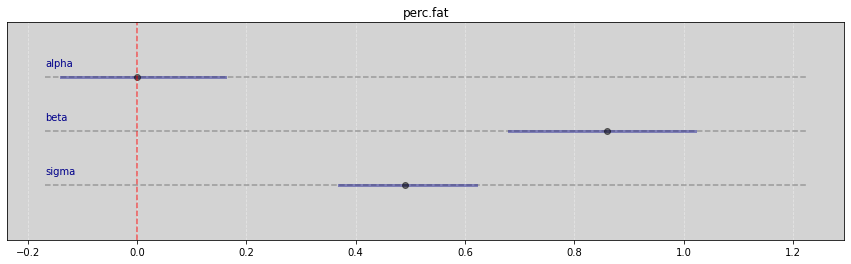

In [22]:
Vide.plot_forest(samples_kf, title='perc.fat')

In [23]:
Vide.summary(samples_kl)

,mean,std,7.0%,93.0%
alpha,0.00,0.07,-0.12,0.14
beta,-0.90,0.08,-1.05,-0.77
sigma,0.41,0.06,0.31,0.52


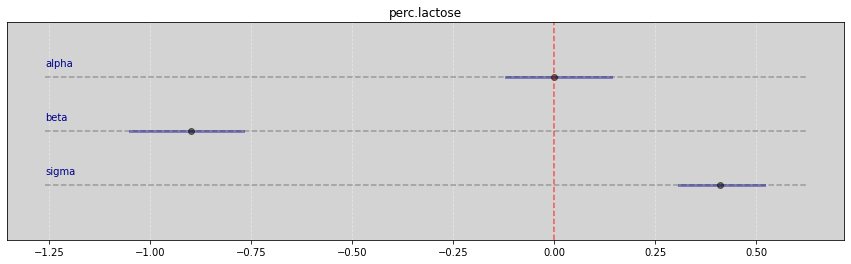

In [24]:
Vide.plot_forest(samples_kl, title='perc.lactose')

### R Code 6.10  -  pag 167

In [25]:
model = """
    data {
        int N;
        vector[N] F;  // Fat
        vector[N] L;  // Lactose
        vector[N] K;  // kcal/g
    }
    
    parameters {
        real alpha;
        real bF;
        real bL;
        real sigma;
    }
    
    model {
        alpha ~ normal(0, 0.2);
        bF ~ normal(0, 0.5);
        bL ~ normal(0, 0.5);
        sigma ~ exponential(1);
        
        K ~ normal(alpha + bF*F + bL*L, sigma);
    }
"""

data = {
    'N': len(df_std['kcal.per.g']),
    'F': df_std['perc.fat'].values,
    'L': df_std['perc.lactose'].values,
    'K': df_std['kcal.per.g'].values,
}

posteriori_FL = stan.build(model, data=data)
samples_FL = posteriori_FL.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.


Messages from stanc:


Warning in '/tmp/httpstan_s4fs5o5l/model_fwhxvmdu.stan', line 22, column 40: A
    normal distribution is given parameter sigma as a scale parameter
    (argument 2), but sigma was not constrained to be strictly positive.
Warning in '/tmp/httpstan_s4fs5o5l/model_fwhxvmdu.stan', line 20, column 8: Parameter
    sigma is given a exponential distribution, which has strictly positive
    support, but sigma was not constrained to be strictly positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Rejecting initial value:


    Error evaluating the log probability at the initial value.


  Exception: exponential_lpdf: Random variable is -1.31389, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  Rejecting initial value:


    Error evaluating the log probability at the initial value.


  Exception: exponential_lpdf: Random variable is -0.596125, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  Rejecting initial value:


    Error evaluating the log probability at the initial value.


  Exception: exponential_lpdf: Random variable is -0.0908111, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  Gradient evaluation took 2.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -776.989, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -20.2688, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -1.28228, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -0.300032, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Rejecting initial value:


    Error evaluating the log probability at the initial value.


  Exception: exponential_lpdf: Random variable is -1.3784, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  Rejecting initial value:


    Error evaluating the log probability at the initial value.


  Exception: exponential_lpdf: Random variable is -0.871093, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  Rejecting initial value:


    Error evaluating the log probability at the initial value.


  Exception: exponential_lpdf: Random variable is -1.78412, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  Gradient evaluation took 5.4e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -614.304, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -14.9471, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -0.0196819, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -0.960986, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 4.9e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -0.00712284, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -0.0463676, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Rejecting initial value:


    Error evaluating the log probability at the initial value.


  Exception: exponential_lpdf: Random variable is -0.135099, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  Gradient evaluation took 2.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -2.97587, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: exponential_lpdf: Random variable is -0.242278, but must be nonnegative! (in '/tmp/httpstan_l3nzhk24/model_fwhxvmdu.stan', line 20, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


In [26]:
Vide.summary(samples_FL)

,mean,std,7.0%,93.0%
alpha,-0.00,0.07,-0.13,0.12
bF,0.25,0.19,-0.11,0.58
bL,-0.66,0.19,-1.00,-0.31
sigma,0.41,0.06,0.31,0.51


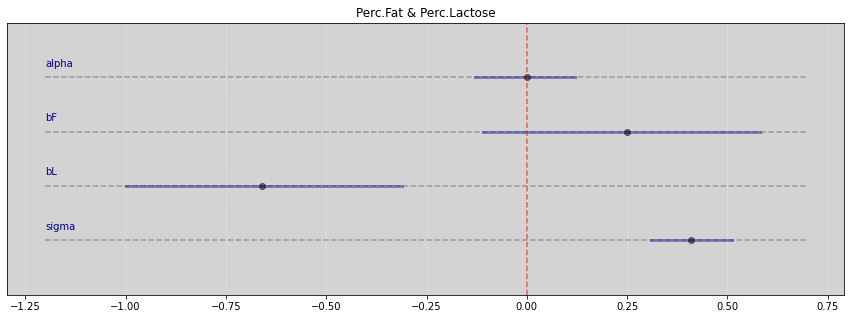

In [27]:
Vide.plot_forest(samples_FL, title='Perc.Fat & Perc.Lactose')

### R Code 6.11 - Pag 168 - Figure 6.3

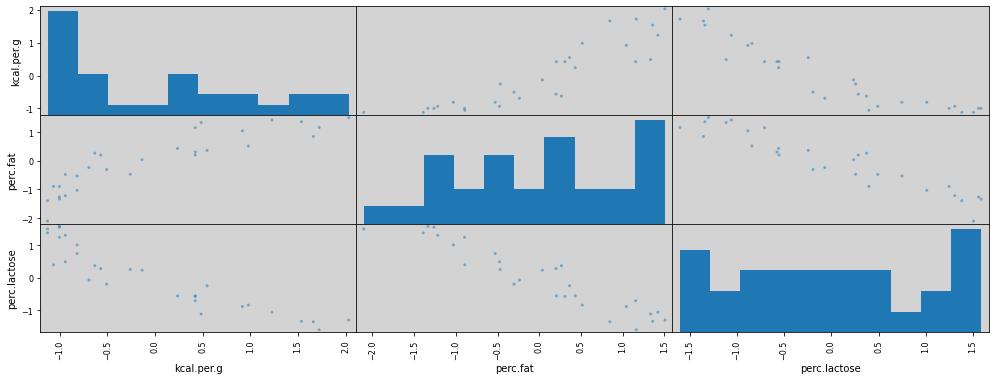

In [28]:
pd.plotting.scatter_matrix(df_std, diagonal='hist', grid=True, figsize=(17, 6))
plt.show()

### R Code 6.12 - Overthinking - Rever

In [29]:
model = """
    data {
        int N;
        vector[N] kcal_per_g;
        vector[N] perc_fat;
        vector[N] new_predictor_X;
    }
    
    parameters {
        real alpha;
        real bF;
        real bX;
        real<lower=0> sigma;
    }
    
    model {
        kcal_per_g ~ normal(alpha + bF * perc_fat + bX * new_predictor_X, sigma);
    }
"""

In [30]:
def generate_predictor_x(r=0.9):
    N = len(df['perc.fat'].values)
    
    mean = r * df['perc.fat'].values
    sd = np.sqrt((1 - r**2) * np.var(df['perc.fat'].values))
    
    return np.random.normal(mean, sd, N)  # New Predictor X

In [31]:
def generate_data_dict(r=0.9):
    data = {
        'N': len(df['kcal.per.g']),
        'kcal_per_g': df['kcal.per.g'].values,
        'perc_fat': df['perc.fat'].values,
        'new_predictor_X': generate_predictor_x(r=r),
    }
    return data

In [32]:
def adjust_model(r=0.9):
    
    parameter_mean_samples  = []
    
    for _ in range(1):  # In book running 100x
        # Runnning the model
        posteriori = stan.build(model, data=generate_data_dict(r=r))
        samples = posteriori.sample(num_chains=4, num_samples=1000)
        
        # Get parameter slope mean
        parameter_mean_samples.append(samples['bF'].flatten().mean())
            
    return parameter_mean_samples

In [33]:
stddev = []
r_sequence = np.arange(0, 0.99, 0.1)  # In book using 0.01

for r in r_sequence:
    parameter = adjust_model(r=r)
    stddev.append(np.mean(parameter))

Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 2.8e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.4e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 2.4e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 4.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 1.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.3e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.3e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 5e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 9e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 7e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 5e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.3e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 6e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 6e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 6e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 9e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 6e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 6e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 5e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 6e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 9e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 5e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 5e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.


  Adjust your expectations accordingly!


Building: found in cache, done.


Messages from stanc:


    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%


Sampling:  11% (900/8000)


Sampling:  36% (2900/8000)


Sampling:  61% (4900/8000)


Sampling:  86% (6900/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 5e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 6e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


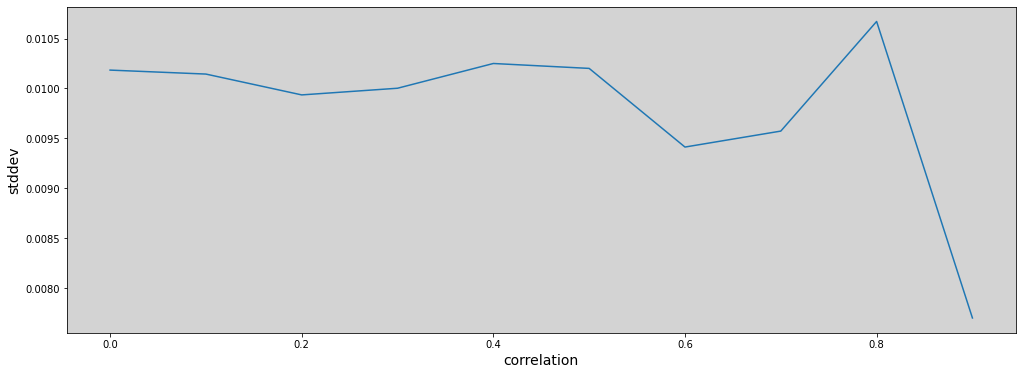

In [34]:
plt.figure(figsize=(17, 6))

plt.plot(r_sequence, stddev)
plt.xlabel("correlation", fontsize=14)
plt.ylabel("stddev", fontsize=14)
plt.show()

### R Code 6.13

In [35]:
np.random.seed(3)

# Quantidade de plantas
N = 100

# Simulação inicial das alturas
h0 = np.random.normal(10, 2, N)

# Atribuindo tratamentos e simulando fungos e tratamentos
treatment = np.repeat([0,1], repeats=int(N/2))
fungus = np.random.binomial(n=1, p=(0.5 - treatment*0.4), size=N)
h1 = h0 + np.random.normal(5 - 3*fungus, 1, N)

# Dataframe
d = pd.DataFrame.from_dict({'h0': h0, 
                            'h1': h1, 
                            'treatment': treatment, 
                            'fungus': fungus})
d.describe().T

,count,mean,std,min,25%,50%,75%,max
h0,100.0,9.782726,2.138707,4.168524,8.279903,9.642072,11.353860,14.316299
h1,100.0,14.209396,2.766929,6.881795,12.512818,14.190085,15.688766,20.786965
treatment,100.0,0.500000,0.502519,0.000000,0.000000,0.500000,1.000000,1.000000
fungus,100.0,0.270000,0.446196,0.000000,0.000000,0.000000,1.000000,1.000000


### R Code 6.14

In [36]:
sim_p = np.random.lognormal(0, 0.25, int(1e4))
pd.DataFrame(sim_p, columns=['sim_p']).describe().T

,count,mean,std,min,25%,50%,75%,max
sim_p,10000.0,1.02366,0.259148,0.391611,0.83898,0.993265,1.174575,2.781105


### R Code 6.15

Modelo:

$$ h_{1,i} \sim Normal(\mu_i, \sigma) $$

$$ \mu_i = h_{0, i} \times p $$

Prioris: 

$$ p \sim LogNormal(0, 0.25) $$

$$ sigma \sim Exponential(1) $$

In [37]:
model = """
    data {
        int N; 
        vector[N] h1;
        vector[N] h0;
    }
    
    parameters {
        real<lower=0> p;
        real<lower=0> sigma;
        
    }
    
    model {
        vector[N] mu;
        mu = h0 * p;
        
        h1 ~ normal(mu, sigma);
        
        // Prioris
        p ~ lognormal(0, 0.25);
        sigma ~ exponential(1); 
    }
"""


data = {
    'N': N,
    'h1': h1,
    'h0': h0,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: 0.2s


Building: 0.3s


Building: 0.4s


Building: 0.5s


Building: 0.6s


Building: 0.7s


Building: 0.8s


Building: 0.9s


Building: 1.0s


Building: 1.1s


Building: 1.2s


Building: 1.3s


Building: 1.4s


Building: 1.5s


Building: 1.6s


Building: 1.7s


Building: 1.8s


Building: 1.9s


Building: 2.0s


Building: 2.1s


Building: 2.2s


Building: 2.3s


Building: 2.4s


Building: 2.5s


Building: 2.6s


Building: 2.7s


Building: 2.8s


Building: 2.9s


Building: 3.0s


Building: 3.1s


Building: 3.2s


Building: 3.3s


Building: 3.4s


Building: 3.5s


Building: 3.7s


Building: 3.8s


Building: 3.9s


Building: 4.0s


Building: 4.1s


Building: 4.2s


Building: 4.3s


Building: 4.4s


Building: 4.5s


Building: 4.6s


Building: 4.7s


Building: 4.8s


Building: 4.9s


Building: 5.0s


Building: 5.1s


Building: 5.2s


Building: 5.3s


Building: 5.4s


Building: 5.5s


Building: 5.6s


Building: 5.7s


Building: 5.8s


Building: 5.9s


Building: 6.0s


Building: 6.1s


Building: 6.2s


Building: 6.3s


Building: 6.4s


Building: 6.5s


Building: 6.6s


Building: 6.7s


Building: 6.8s


Building: 6.9s


Building: 7.0s


Building: 7.1s


Building: 7.2s


Building: 7.3s


Building: 7.5s


Building: 7.6s


Building: 7.7s


Building: 7.8s


Building: 7.9s


Building: 8.0s


Building: 8.1s


Building: 8.2s


Building: 8.3s


Building: 8.4s


Building: 8.5s


Building: 8.6s


Building: 8.7s


Building: 8.8s


Building: 8.9s


Building: 9.0s


Building: 9.1s


Building: 9.2s


Building: 9.3s


Building: 9.4s


Building: 9.5s


Building: 9.6s


Building: 9.7s


Building: 9.8s


Building: 9.9s


Building: 10.0s


Building: 10.1s


Building: 10.2s


Building: 10.3s


Building: 10.4s


Building: 10.5s


Building: 10.6s


Building: 10.7s


Building: 10.9s


Building: 11.0s


Building: 11.1s


Building: 11.2s


Building: 11.3s


Building: 11.4s


Building: 11.5s


Building: 11.6s


Building: 11.7s


Building: 11.8s


Building: 11.9s


Building: 12.0s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.10.1/m

Building: 12.1s


Building: 12.2s


Building: 12.3s


Building: 12.4s


Building: 12.5s


Building: 12.6s


/home/rodolpho/.cache/httpstan/4.10.1/models/iznxfo2k/model_iznxfo2k.cpp: In instantiation of ‘void model_iznxfo2k_namespace::model_iznxfo2k::transform_inits_impl(const stan::io::var_context&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; stan::require_vector_t<T_y>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/rodolpho/.cache/httpstan/4.10.1/models/iznxfo2k/model_iznxfo2k.cpp:375:50:   required from here
/home/rodolpho/.cache/httpstan/4.10.1/models/iznxfo2k/model_iznxfo2k.cpp:261:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  261 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/home/rodolpho/.cache/httpstan/4.10.1/models/iznxfo2k/model_iznxfo2k.cpp: In instantiation of ‘void model_iznxfo2k_namespace::model_iznxfo2k::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI =

Building: 12.7s


Building: 12.8s


odels/iznxfo2k/model_iznxfo2k.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = double; T2 = double; T3 = double; T_z = double; ScalarT = double; TupleT = std::tuple<double, double, double>]’:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = double; T2 = double; T3 = double; T_z = double; ScalarT = double; TupleT = std::tuple<double, double, double, double>]’
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/in

Building: 12.9s


Building: 13.0s


Building: 13.1s


Building: 13.2s


Building: 13.3s


Building: 13.4s


Building: 13.5s


Building: 13.6s


Building: 13.7s


Building: 13.8s


Building: 13.9s


Building: 14.0s


Building: 14.1s


Building: 14.2s


Building: 14.3s


Building: 14.4s


Building: 14.6s


Building: 14.7s


Building: 14.8s


Building: 14.9s


Building: 15.0s


Building: 15.1s


Building: 15.2s


Building: 15.3s


Building: 15.4s


Building: 15.5s


Building: 15.6s


Building: 15.7s


Building: 15.8s


Building: 15.9s


Building: 16.0s


Building: 16.1s


Building: 16.2s


Building: 16.3s


Building: 16.4s


Building: 16.5s


Building: 16.6s


Building: 16.7s


Building: 16.8s


Building: 16.9s


Building: 17.0s


Building: 17.1s


Building: 17.2s


Building: 17.3s


Building: 17.4s


Building: 17.5s


Building: 17.6s


Building: 17.7s


Building: 17.8s


Building: 17.9s


Building: 18.0s


Building: 18.1s


Building: 18.2s


Building: 18.4s


Building: 18.5s


Building: 18.6s


Building: 18.7s


Building: 18.8s


Building: 18.9s


Building: 19.0s


Building: 19.1s


Building: 19.2s


Building: 19.3s


Building: 19.4s


Building: 19.5s


Building: 19.6s


Building: 19.7s


Building: 19.8s


Building: 19.9s


Building: 20.0s


Building: 20.1s


Building: 20.2s


Building: 20.3s


Building: 20.4s


Building: 20.5s


Building: 20.6s


Building: 20.7s


Building: 20.8s


Building: 20.9s


Building: 21.0s


Building: 21.1s


Building: 21.2s


Building: 21.3s


Building: 21.4s


Building: 21.5s


Building: 21.6s


Building: 21.7s


Building: 21.8s


Building: 22.0s


Building: 22.1s


Building: 22.2s


Building: 22.3s


Building: 22.4s


Building: 22.5s


Building: 22.6s


Building: 22.7s


Building: 22.8s


Building: 22.9s


Building: 23.0s


Building: 23.1s


Building: 23.2s


Building: 23.3s


Building: 23.4s


Building: 23.5s


Building: 23.6s


Building: 23.7s


Building: 23.8s


Building: 23.9s


Building: 24.0s


Building: 24.1s


Building: 24.2s


Building: 24.3s


Building: 24.4s


Building: 24.5s


Building: 24.6s


Building: 24.7s


Building: 24.8s


Building: 24.9s


Building: 25.0s


Building: 25.1s


Building: 25.2s


Building: 25.3s


Building: 25.4s


Building: 25.6s


Building: 25.7s


Building: 25.8s


Building: 25.9s


Building: 26.0s


Building: 26.1s


Building: 26.2s


Building: 26.3s


Building: 26.4s


Building: 26.5s


Building: 26.6s


Building: 26.7s


Building: 26.8s


Building: 26.9s


Building: 27.0s


Building: 27.1s


Building: 27.2s


Building: 27.3s


Building: 27.4s


Building: 27.5s


Building: 27.6s, done.


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 2.6e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 2.8e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.


  Adjust your expectations accordingly!


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_k7u2blux/model_iznxfo2k.stan', line 18, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_k7u2blux/model_iznxfo2k.stan', line 18, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_k7u2blux/model_iznxfo2k.stan', line 18, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_k7u2blux/model_iznxfo2k.stan', line 18, column 8 to column 31)


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


  Gradient evaluation took 2.7e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.


  Adjust your expectations accordingly!


In [38]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
p,1.43,0.02,1.40,1.46
sigma,1.99,0.15,1.72,2.25


### RCode 6.16

Modelo *post-treatment bias*:

$$ h_{1, i} \sim Normal(\mu_i, \sigma) $$

$$ \mu_i = h_{0, i} \times p $$

$$ p = \alpha + \beta_T T_i + \beta_F F_i $$

prioris:

$$ \alpha \sim LogNormal(0, 0.25) $$

$$ \beta_T \sim Normal(0, 0.5) $$

$$ \beta_F \sim Normal(0, 0.5) $$

$$ \sigma \sim Exponential(1) $$

In [39]:
"""
To mu definition below
----------------------

vector[N] a;
vector[N] b;
vector[N] c; 

These operation:
c = a .* b;

Is the same operation:
for (n in 1:N) {
  c[n] = a[n] * b[n];
}

Reference:
https://mc-stan.org/docs/reference-manual/arithmetic-expressions.html
"""

model = """
    data {
        int N;
        vector[N] h0;
        vector[N] h1;
        vector[N] T;  // Treatment
        vector[N] F;  // Fungus
    }

    parameters {
        real alpha;
        real bT;
        real bF;
        real<lower=0> sigma;
    }

    model {
        vector[N] mu;
        vector[N] p;
        
        p = alpha + bT * T + bF * F;
        mu = h0 .* p;  
    
        // likelihood
        h1 ~ normal(mu, sigma);
    
        // prioris
        alpha ~ lognormal(0, 0.25);
        bT ~ normal(0, 0.5);
        bF ~ normal(0, 0.5);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': N,
    'h0': h0,
    'h1': h1,
    'T': treatment,
    'F': fungus,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: 0.2s


Building: 0.3s


Building: 0.4s


Building: 0.5s


Building: 0.6s


Building: 0.7s


Building: 0.8s


Building: 0.9s


Building: 1.0s


Building: 1.1s


Building: 1.2s


Building: 1.3s


Building: 1.4s


Building: 1.5s


Building: 1.6s


Building: 1.7s


Building: 1.8s


Building: 1.9s


Building: 2.0s


Building: 2.1s


Building: 2.2s


Building: 2.3s


Building: 2.4s


Building: 2.5s


Building: 2.6s


Building: 2.7s


Building: 2.8s


Building: 2.9s


Building: 3.0s


Building: 3.1s


Building: 3.3s


Building: 3.4s


Building: 3.5s


Building: 3.6s


Building: 3.7s


Building: 3.8s


Building: 3.9s


Building: 4.0s


Building: 4.1s


Building: 4.2s


Building: 4.3s


Building: 4.4s


Building: 4.5s


Building: 4.6s


Building: 4.7s


Building: 4.8s


Building: 4.9s


Building: 5.0s


Building: 5.1s


Building: 5.2s


Building: 5.3s


Building: 5.4s


Building: 5.5s


Building: 5.6s


Building: 5.7s


Building: 5.8s


Building: 5.9s


Building: 6.0s


Building: 6.1s


Building: 6.2s


Building: 6.4s


Building: 6.5s


Building: 6.6s


Building: 6.7s


Building: 6.8s


Building: 6.9s


Building: 7.0s


Building: 7.1s


Building: 7.2s


Building: 7.3s


Building: 7.4s


Building: 7.5s


Building: 7.6s


Building: 7.7s


Building: 7.8s


Building: 7.9s


Building: 8.0s


Building: 8.1s


Building: 8.2s


Building: 8.3s


Building: 8.4s


Building: 8.5s


Building: 8.6s


Building: 8.7s


Building: 8.8s


Building: 8.9s


Building: 9.0s


Building: 9.1s


Building: 9.2s


Building: 9.3s


Building: 9.4s


Building: 9.5s


Building: 9.6s


Building: 9.7s


Building: 9.8s


Building: 9.9s


Building: 10.0s


Building: 10.1s


Building: 10.3s


Building: 10.4s


Building: 10.5s


Building: 10.6s


Building: 10.7s


Building: 10.8s


Building: 10.9s


Building: 11.0s


Building: 11.1s


Building: 11.2s


Building: 11.3s


Building: 11.4s


Building: 11.5s


Building: 11.6s


Building: 11.7s


Building: 11.8s


Building: 11.9s


Building: 12.0s


Building: 12.1s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.10.1/m

Building: 12.2s


Building: 12.3s


Building: 12.4s


Building: 12.5s


Building: 12.6s


Building: 12.7s


/home/rodolpho/.cache/httpstan/4.10.1/models/o45svakw/model_o45svakw.cpp: In instantiation of ‘void model_o45svakw_namespace::model_o45svakw::transform_inits_impl(const stan::io::var_context&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; stan::require_vector_t<T_y>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/rodolpho/.cache/httpstan/4.10.1/models/o45svakw/model_o45svakw.cpp:488:50:   required from here
/home/rodolpho/.cache/httpstan/4.10.1/models/o45svakw/model_o45svakw.cpp:361:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  361 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/home/rodolpho/.cache/httpstan/4.10.1/models/o45svakw/model_o45svakw.cpp: In instantiation of ‘void model_o45svakw_namespace::model_o45svakw::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI =

Building: 12.8s


Building: 12.9s


Building: 13.0s


/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]’:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<double>; T

Building: 13.1s


Building: 13.2s


Building: 13.3s


Building: 13.4s


Building: 13.5s


Building: 13.6s


Building: 13.7s


Building: 13.8s


Building: 13.9s


Building: 14.1s


Building: 14.2s


Building: 14.3s


Building: 14.4s


Building: 14.5s


Building: 14.6s


Building: 14.7s


Building: 14.8s


Building: 14.9s


Building: 15.0s


Building: 15.1s


Building: 15.2s


Building: 15.3s


Building: 15.4s


Building: 15.5s


Building: 15.6s


Building: 15.7s


Building: 15.8s


Building: 15.9s


Building: 16.0s


Building: 16.1s


Building: 16.2s


Building: 16.3s


Building: 16.4s


Building: 16.5s


Building: 16.6s


Building: 16.7s


Building: 16.8s


Building: 16.9s


Building: 17.0s


Building: 17.1s


Building: 17.2s


Building: 17.3s


Building: 17.4s


Building: 17.5s


Building: 17.6s


Building: 17.7s


Building: 17.8s


Building: 18.0s


Building: 18.1s


Building: 18.2s


Building: 18.3s


Building: 18.4s


Building: 18.5s


Building: 18.6s


Building: 18.7s


Building: 18.8s


Building: 18.9s


Building: 19.0s


Building: 19.1s


Building: 19.2s


Building: 19.3s


Building: 19.4s


Building: 19.5s


Building: 19.6s


Building: 19.7s


Building: 19.8s


Building: 19.9s


Building: 20.0s


Building: 20.1s


Building: 20.2s


Building: 20.3s


Building: 20.4s


Building: 20.5s


Building: 20.6s


Building: 20.7s


Building: 20.8s


Building: 20.9s


Building: 21.0s


Building: 21.1s


Building: 21.2s


Building: 21.3s


Building: 21.4s


Building: 21.6s


Building: 21.7s


Building: 21.8s


Building: 21.9s


Building: 22.0s


Building: 22.1s


Building: 22.2s


Building: 22.3s


Building: 22.4s


Building: 22.5s


Building: 22.6s


Building: 22.7s


Building: 22.8s


Building: 22.9s


Building: 23.0s


Building: 23.1s


Building: 23.2s


Building: 23.3s


Building: 23.4s


Building: 23.5s


Building: 23.6s


Building: 23.7s


Building: 23.8s


Building: 23.9s


Building: 24.0s


Building: 24.1s


Building: 24.2s


Building: 24.3s


Building: 24.4s


Building: 24.5s


Building: 24.6s


Building: 24.7s


Building: 24.9s


Building: 25.0s


Building: 25.1s


Building: 25.2s


Building: 25.3s


Building: 25.4s


Building: 25.5s


Building: 25.6s


Building: 25.7s


Building: 25.8s


Building: 25.9s


Building: 26.0s


Building: 26.1s


Building: 26.2s


Building: 26.3s


Building: 26.4s


Building: 26.5s


Building: 26.6s


Building: 26.7s


Building: 26.8s


Building: 26.9s


Building: 27.0s


Building: 27.1s


Building: 27.2s


Building: 27.3s


Building: 27.4s


Building: 27.5s


Building: 27.6s


Building: 27.7s


Building: 27.8s


Building: 27.9s


Building: 28.0s


Building: 28.1s


Building: 28.2s


Building: 28.3s


Building: 28.4s


Building: 28.6s


Building: 28.7s


Building: 28.8s


Building: 28.9s


Building: 29.0s


Building: 29.1s


Building: 29.2s


Building: 29.3s


Building: 29.4s


Building: 29.5s


Building: 29.6s


Building: 29.7s


Building: 29.8s


Building: 29.9s


AttributeError: 'NoneType' object has no attribute 'sample'

In [40]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,1.53,0.03,1.48,1.59
bT,-0.03,0.04,-0.09,0.03
bF,-0.32,0.04,-0.39,-0.25
sigma,1.44,0.11,1.26,1.64


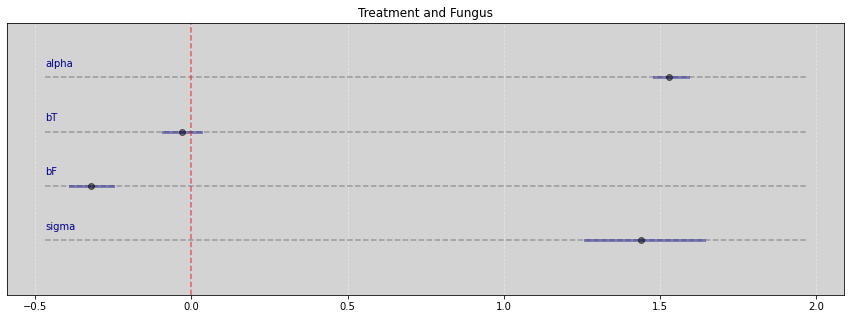

In [41]:
Vide.plot_forest(samples, title='Treatment and Fungus')

### R Code 6.17

In [42]:
model = """
    data {
        int N;
        vector[N] h0;
        vector[N] h1;
        vector[N] T;  // Treatment
    }

    parameters {
        real<lower=0> alpha;
        real bT;
        real<lower=0> sigma;
    }
    
    model {
        vector[N] mu;
        vector[N] p;

        p = alpha + bT * T;
        mu = h0 .* p;

        h1 ~ normal(mu, sigma);

        alpha ~ lognormal(0, 0.2);
        bT ~ normal(0, 0.5);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': N,
    'h0': h0,
    'h1': h1,
    'T': treatment,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_zszojnzt/model_iiartt5i.stan', line 22, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the fo

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_zszojnzt/model_iiartt5i.stan', line 22, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_zszojnzt/model_iiartt5i.stan', line 22, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill

In [43]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,1.36,0.03,1.31,1.41
bT,0.13,0.04,0.06,0.20
sigma,1.89,0.14,1.65,2.14


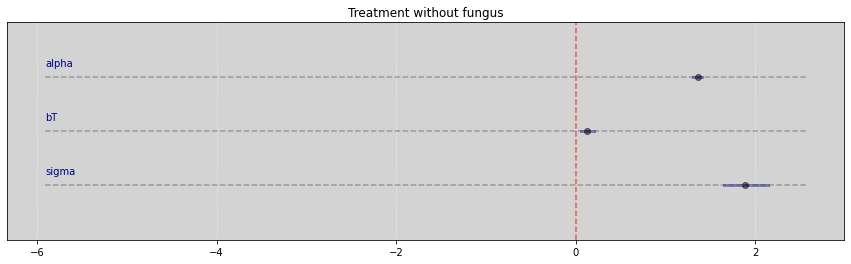

In [44]:
Vide.plot_forest(samples, title='Treatment without fungus')

### R Code 6.18

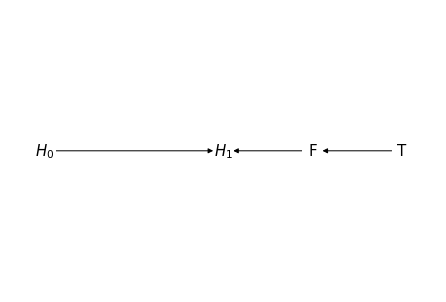

In [45]:
G = nx.DiGraph()

nodes = {0: '$H_0$', 
         1: '$H_1$', 
         2: 'F', 
         3: 'T'}

for i in nodes:
    G.add_node(nodes[i])

edges = [(nodes[0], nodes[1]),
         (nodes[2], nodes[1]),
         (nodes[3], nodes[2])]

G.add_edges_from(edges)

# explicitly set positions
pos = {nodes[0]: (0, 0), 
       nodes[1]: (1, 0), 
       nodes[2]: (1.5, 0), 
       nodes[3]: (2, 0)}

options = {
    "font_size": 15,
    "node_size": 400,
    "node_color": "white",
    "edgecolors": "white",
    "linewidths": 1,
    "width": 1,
}

nx.draw(G, pos, with_labels=True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
# ax.margins(0.01)
plt.axis("off")
plt.show()

### R Code 6.19

$$F \_||\_ H_0$$

$$H_0 \_||\_ T$$

$$ H_1 \_||\_ T | F $$


### R Code 6.20

In [46]:
# np.random.seed(3)

# Quantidade de plantas
N = 100

# Simulação inicial das alturas
h0 = np.random.normal(10, 2, N)

# Atribuindo tratamentos e simulando fungos e tratamentos
treatment = np.repeat([0, 1], repeats=int(N/2))

M = np.random.binomial(n=1, p=0.5, size=N)  # Moisture -> Bernoulli(p=0.5)

fungus = np.random.binomial(n=1, p=(0.5 - treatment * 0.4 + 0.4 * M), size=N)
h1 = h0 + np.random.normal((5 + 3 * M), 1, N)

# Dataframe
d2 = pd.DataFrame.from_dict({'h0': h0, 
                            'h1': h1, 
                            'treatment': treatment, 
                            'fungus': fungus})
d2.describe().T 

,count,mean,std,min,25%,50%,75%,max
h0,100.0,10.091610,1.976358,6.313914,8.850678,10.169278,11.369749,15.273222
h1,100.0,16.510702,2.715874,10.105379,14.711143,15.899131,18.671828,22.662508
treatment,100.0,0.500000,0.502519,0.000000,0.000000,0.500000,1.000000,1.000000
fungus,100.0,0.480000,0.502117,0.000000,0.000000,0.000000,1.000000,1.000000


In [47]:
# RCode 6.17 with new database

model = """
    data {
        int N;
        vector[N] h0;
        vector[N] h1;
        vector[N] T;  // Treatment
    }

    parameters {
        real<lower=0> alpha;
        real bT;
        real<lower=0> sigma;
    }
    
    model {
        vector[N] mu;
        vector[N] p;

        p = alpha + bT * T;
        mu = h0 .* p;

        h1 ~ normal(mu, sigma);

        alpha ~ lognormal(0, 0.2);
        bT ~ normal(0, 0.5);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': N,
    'h0': d2.h0.values,
    'h1': d2.h1.values,
    'T': d2.treatment.values,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_zszojnzt/model_iiartt5i.stan', line 22, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_zszojnzt/model_iiartt5i.stan', line 22, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in '/tmp/httpstan_zszojnzt/model_iiartt5i.stan', line 22, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill

In [48]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,1.60,0.03,1.55,1.65
bT,0.02,0.04,-0.05,0.09
sigma,2.16,0.15,1.87,2.43


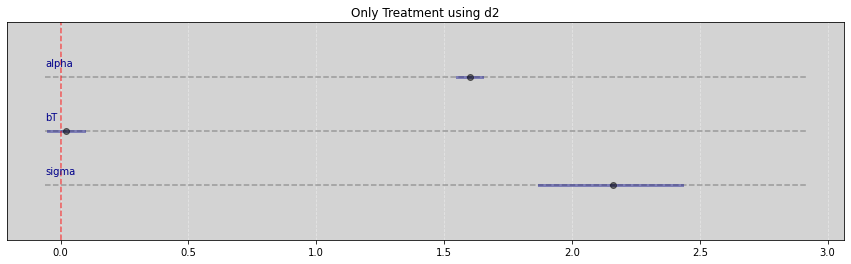

In [49]:
Vide.plot_forest(samples, title="Only Treatment using d2")

In [50]:
# RCode 6.16 with new database

model = """
    data {
        int N;
        vector[N] h0;
        vector[N] h1;
        vector[N] T;  // Treatment
        vector[N] F;  // Fungus
    }

    parameters {
        real alpha;
        real bT;
        real bF;
        real<lower=0> sigma;
    }

    model {
        vector[N] mu;
        vector[N] p;
        
        p = alpha + bT * T + bF * F;
        mu = h0 .* p;  
    
        // likelihood
        h1 ~ normal(mu, sigma);
    
        // prioris
        alpha ~ lognormal(0, 0.25);
        bT ~ normal(0, 0.5);
        bF ~ normal(0, 0.5);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': N,
    'h0': d2.h0.values,
    'h1': d2.h1.values,
    'T': d2.treatment.values,
    'F': d2.fungus.values,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_3v2pqc1w/model_2uvo3jva.stan', line 28, column 8: Parameter
    alpha is given a lognormal distribution, which has strictly positive
    support, but alpha was not constrained to be strictly positive.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -2.00689, but must be nonnegative! (in '/tmp/httpstan__bvsoudy/model_2uvo3jva.stan', line 28, column 8 to column 35)
  If this warning occurs sporadically, such as for highly constrained variable types li

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -83.0723, but must be nonnegative! (in '/tmp/httpstan__bvsoudy/model_2uvo3jva.stan', line 28, column 8 to column 35)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.401537, but must be nonnegative! (in '/tmp/httpstan__bvsoudy/model_2uv

In [51]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,1.53,0.04,1.46,1.60
bT,0.06,0.04,-0.02,0.14
bF,0.11,0.04,0.03,0.19
sigma,2.10,0.15,1.83,2.36


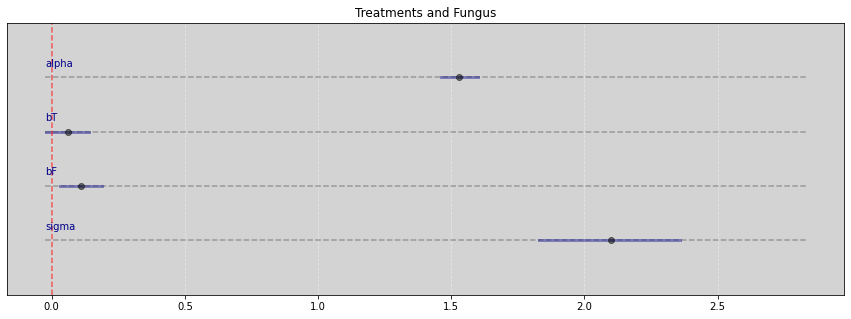

In [52]:
Vide.plot_forest(samples, title="Treatments and Fungus")

## Collider Bias

### 6.21

**Simulação**

1. Cada ano, $20$ pessoas nascem com valores de felicidade uniformente distribuídos


2. Cada ano, cada uma das pessoas envelhece $1$ ano. A sua felicidade não muda.


3. Aos $18$ anos, um indivíduo de casa com a probabilidade de porporcional a sua felicidade.


4. Uma vez casado, o indivíduo se mantém casado.


5. Aos 65 anos, o indivíduo deixa a amostra (Vai morar na Espanha)

In [53]:
# Function based in https://github.com/rmcelreath/rethinking/blob/master/R/sim_happiness.R
# Inv_logit R-function in https://stat.ethz.ch/R-manual/R-devel/library/boot/html/inv.logit.html

def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))

def sim_happiness(seed=1977 , N_years=1000 , max_age=65 , N_births=20 , aom=18):
    np.random.seed(seed)
    
    df = pd.DataFrame(columns=['age', 'married', 'happiness'])

    for i in range(N_years):
        # Update age
        df['age'] += 1

        # Move to Spain when age == max_age
        df.drop(df[df['age'] == max_age].index, inplace=True)
        
        # Will marry?
        index_unmarried_aom = df.query((f'age>={aom} and married==0')).index.tolist()
        weddings = np.random.binomial(1, inv_logit(df.loc[index_unmarried_aom, 'happiness'] - 4))
        df.loc[index_unmarried_aom, 'married'] = weddings
        
        # New borns
        df_aux = pd.DataFrame(columns=['age', 'married', 'happiness'])

        df_aux.loc[:, 'age'] = np.zeros(N_births).astype(int)
        df_aux.loc[:, 'married'] = np.zeros(N_births).astype(int)
        df_aux.loc[:, 'happiness'] = np.linspace(-2, 2, N_births)  # np.random.uniform(0, 1, N_births)
        
        df = df.append(df_aux, ignore_index=True)
        
    return df

In [54]:
df = sim_happiness(seed=1997, N_years=1000)
df.describe(percentiles=[0.055, 0.945], include='all').T

,count,unique,top,freq,mean,std,min,5.5%,50%,94.5%,max
age,1300.0,65.0,64.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
married,1300.0,2.0,0.0,950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
happiness,1300.0,NaN,NaN,NaN,-8.335213e-17,1.214421,-2.0,-1.789474,-1.110223e-16,1.789474,2.0


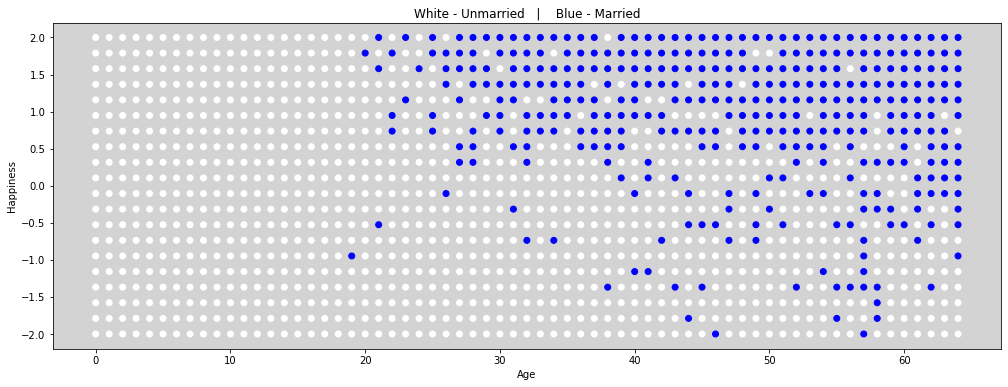

In [55]:
# Figure 6.21
plt.figure(figsize=(17, 6))

colors = ['white' if is_married == 0 else 'blue' for is_married in df.married ]

plt.scatter(df.age, df.happiness, color=colors)

plt.title('White - Unmarried   |    Blue - Married')
plt.xlabel('Age')
plt.ylabel('Happiness')
plt.show()

### R Code 6.22

In [56]:
df2 = df[df.age > 17].copy()  # Only adults
df2.loc[:, 'age'] = (df2.age - 18) / (65 - 18)

### R Code 6.23

Modelo:

$$ happiness \sim Normal(\mu_i, \sigma) $$

$$ \mu_i = \alpha_{_{MID}[i]} + \beta_A \times A_i $$

prioris:

$$ \alpha_{_{MID}[i]} \sim Normal(0, 1)$$

$$ \beta_A \sim Normal(0, 2) $$

$$ \sigma \sim Exponential(1); $$

In [57]:
model = """
    data {
        int N;
        vector[N] age;
        vector[N] happiness;
        array[N] int married;  // Must be integer because this is index to alpha. 
    }
    
    parameters {
        vector[2] alpha;  // can also be written like this: real alpha[2] or array[2] int alpha;
        real beta_age;
        real<lower=0> sigma;
    }
    
    model {
        vector[N] mu;
        
        for (i in 1:N){
            mu[i] = alpha[ married[i] ] + beta_age * age[i];
        }
        
        happiness ~ normal(mu, sigma);
        
        // Prioris
        alpha ~ normal(0, 1);
        beta_age ~normal(0, 2);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': len(df2.happiness.values),
    'age': df2.age.values,
    'happiness': df2.happiness.values,
    'married': df2.married.values + 1  # Because the index in stan starting with 1 
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:   2% (200/8000)
Sampling:  10% (800/8000)
Sampling:  15% (1200/8000)
Sampling:  40% (3200/8000)
Sampling:  62% (5000/8000)
Sampling:  80% (6400/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000115 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.15 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_fshdmqak/model_n7n6r2wh.stan', line 22, column 8 to column 38)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Messa

In [58]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha[0],-0.19,0.06,-0.30,-0.07
alpha[1],1.38,0.09,1.22,1.53
beta_age,-0.81,0.11,-1.02,-0.62
sigma,0.97,0.02,0.93,1.02


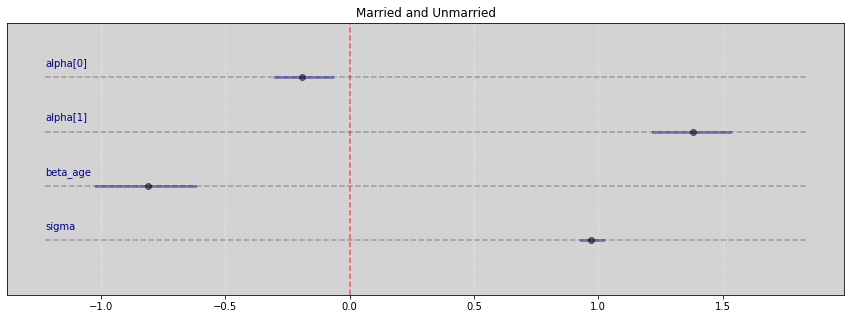

In [59]:
Vide.plot_forest(samples, title='Married and Unmarried')

### R Code 6.24

In [60]:
model = """
    data {
        int N;
        vector[N] age;
        vector[N] happiness;
    }
    
    parameters {
        real alpha;
        real beta_age;
        real<lower=0> sigma;
    }
    
    model {
        vector[N] mu;
        
        for (i in 1:N){
            mu[i] = alpha + beta_age * age[i];
        }
        
        happiness ~ normal(mu, sigma);
        
        alpha ~ normal(0, 1);
        beta_age ~ normal(0, 2);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': len(df2.happiness.values),
    'happiness': df2.happiness.values,
    'age': df2.age.values,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:   6% (500/8000)
Sampling:  16% (1300/8000)
Sampling:  22% (1800/8000)
Sampling:  48% (3800/8000)
Sampling:  66% (5300/8000)
Sampling:  81% (6500/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.00011 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000176 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.76 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/http

In [61]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,-0.00,0.08,-0.15,0.14
beta_age,0.00,0.14,-0.23,0.27
sigma,1.22,0.03,1.17,1.27


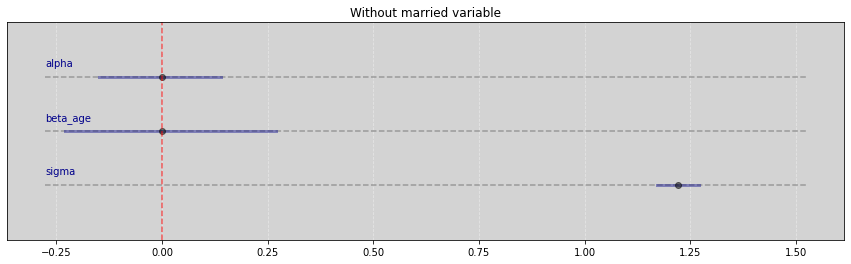

In [62]:
Vide.plot_forest(samples, title='Without married variable')

### RCode 6.25

In [63]:
N = 200  # Qty of triads  (G, P, C)

b_GP = 1  # Direct effect of G on P 
b_GC = 0  # Direct effect of G on C
b_PC = 1  # Direct effect of P on C
b_U  = 2  # Direct effect of U on  P and C

### R Code 6.26

In [64]:
np.random.seed(3)

U = 2 * np.random.binomial(n=1, p=0.5, size=N) - 1  # {-1, 1}
# U = np.random.normal(0, 1, N)  # Simulation more realistic example 

G = np.random.normal(0, 1, size=N)  # Has not influence

P = np.random.normal(b_GP*G + b_U*U, 1, size=N)

C = np.random.normal(b_PC*P + b_GC*G + b_U*U, 1, size=N)

d = pd.DataFrame.from_dict({'C':C, 'P':P, 'G':G, 'U':U})

d.head()

,C,P,G,U
0,0.986995,1.197787,-0.795915,1
1,5.715446,3.573636,0.072746,1
2,-4.387763,-3.131400,-0.261240,-1
3,2.598454,0.462321,-1.298047,1
4,6.614388,4.931193,2.676112,1


### R Code 6.27

In [65]:
# C ~ P + G

model = """
    data {
        int N;
        vector[N] C;
        vector[N] P;
        vector[N] G;
    }
    
    parameters {
        real alpha;
        real b_PC;
        real b_GC;
        real<lower=0> sigma;
    }
    
    model {
        vector[N] mu;
        
        for (i in 1:N){
            mu[i] = alpha + b_PC*P[i] + b_GC*G[i];
        }
        
        C ~ normal(mu, sigma);
        
        alpha ~ normal(0, 1);
        b_PC ~ normal(0, 1);
        b_GC ~ normal(0, 1);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': len(d.C.values),
    'C': d.C.values,
    'P': d.P.values,
    'G': d.G.values,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!


In [66]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,0.07,0.10,-0.10,0.24
b_PC,1.77,0.04,1.70,1.84
b_GC,-0.82,0.10,-1.01,-0.65
sigma,1.33,0.07,1.20,1.45


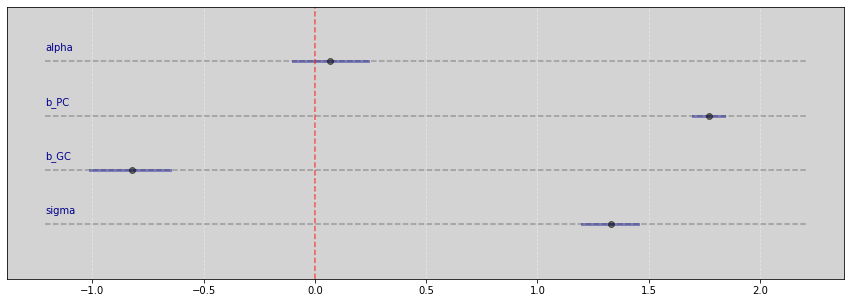

In [67]:
Vide.plot_forest(samples)

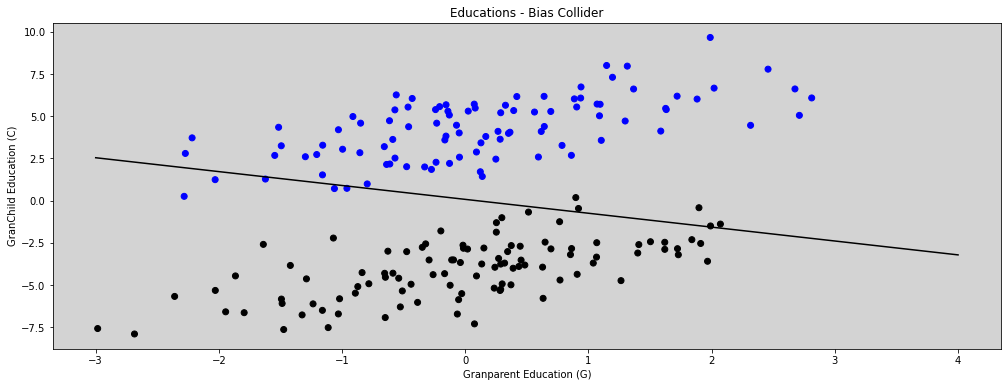

In [68]:
# Figure 6.5
plt.figure(figsize=(17, 6))

colors = ['black' if u <= 0 else 'blue' for u in U]  # Unobserved

x = np.linspace(-3, 4)
y = np.mean(samples['alpha']) + np.mean(samples['b_GC']) * x

plt.plot(x, y, c='k')

plt.scatter(G, C, c=colors)
plt.xlabel('Granparent Education (G)')
plt.ylabel('GranChild Education (C)')
plt.title('Educations - Bias Collider')
plt.show()

### R Code 6.28

In [69]:
model = """
    data {
        int N;
        vector[N] C;
        vector[N] P;
        vector[N] G;
        vector[N] U;
    }
    
    parameters {
        real alpha;
        real b_PC;
        real b_GC;
        real b_U;
        real<lower=0> sigma;
    }
    
    model {
        vector[N] mu;
        
        for (i in 1:N){
            mu[i] = alpha + b_PC*P[i] + b_GC*G[i] + b_U*U[i];
        }
        
        C ~ normal(mu, sigma);
        
        alpha ~ normal(0, 1);
        b_GC ~ normal(0, 1);
        b_PC ~ normal(0, 1);
        b_U  ~ normal(0, 1);
        sigma ~ exponential(1);
    }
"""

data = {
    'N': len(d.C.values),
    'C': d.C.values,
    'P': d.P.values,
    'G': d.G.values,
    'U': d.U.values,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:   4% (300/8000)
Sampling:   8% (600/8000)
Sampling:  12% (1000/8000)
Sampling:  38% (3000/8000)
Sampling:  59% (4700/8000)
Sampling:  80% (6400/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 9.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.91 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
  Adjust your expectations accordingly!


In [70]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,0.07,0.07,-0.06,0.21
b_PC,1.00,0.07,0.86,1.12
b_GC,-0.03,0.10,-0.22,0.15
b_U,1.97,0.17,1.68,2.27
sigma,1.02,0.05,0.93,1.11


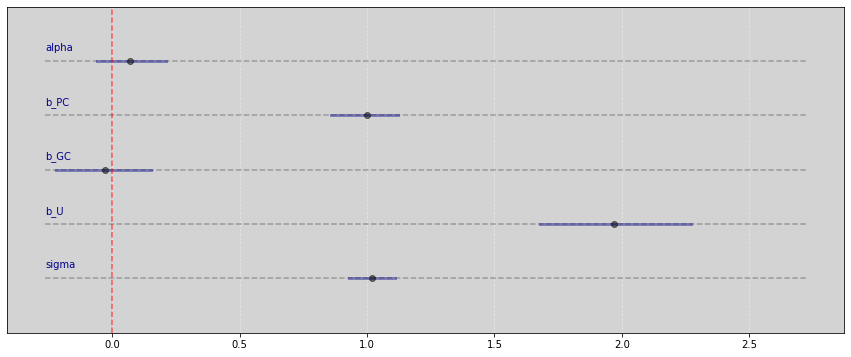

In [71]:
Vide.plot_forest(samples)

### R Code 6.29

Reference: [*ksachdeva*](https://colab.research.google.com/github/ksachdeva/rethinking-tensorflow-probability/blob/master/notebooks/06_the_haunted_dag_and_the_causal_terror.ipynb#scrollTo=wyUj47f7-kLy)

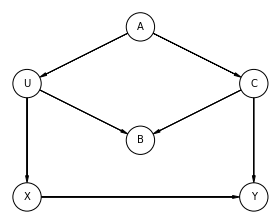

In [72]:
dag_6_1 = CausalGraphicalModel(
    nodes=["C", "U", "B", "A", "X", "Y"],
    edges=[
        ("U", "X"),
        ("A", "U"),
        ("A", "C"),
        ("C", "Y"),
        ("U", "B"),
        ("C", "B"),
        ("X", "Y"),
    ],
)

pgm = daft.PGM()
coordinates = {
    "U": (0, 2),
    "C": (4, 2),
    "A": (2, 3),
    "B": (2, 1),
    "X": (0, 0),
    "Y": (4, 0),
}
for node in dag_6_1.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in dag_6_1.dag.edges:
    pgm.add_edge(*edge)
pgm.render()

plt.show()

In [73]:
all_adjustment_sets = dag_6_1.get_all_backdoor_adjustment_sets("X", "Y")

for s in all_adjustment_sets:
    if all(not t.issubset(s) for t in all_adjustment_sets if t != s):
        if s != {"U"}:
            print(s)

frozenset({'C'})
frozenset({'A'})


### R Code 6.30

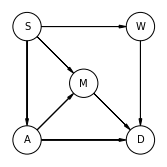

In [74]:
dag_6_2 = CausalGraphicalModel(
    nodes=['S', 'A', 'M', 'W', 'D'],
    edges=[
        ('S','W'),
        ('S','M'),
        ('S','A'),
        ('A','M'),
        ('A','D'),
        ('M','D'),
        ('W','D'),
    ],
)

# Drawing the DAG
pgm = daft.PGM()
coordinates = {
    "S": (0, 2),
    "A": (0, 0),
    "M": (1, 1),
    "W": (2, 2),
    "D": (2, 0),
}
for node in dag_6_2.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in dag_6_2.dag.edges:
    pgm.add_edge(*edge)
pgm.render()

plt.show()

In [75]:
# R Code 6.30

all_adjustment_sets = dag_6_2.get_all_backdoor_adjustment_sets("W", "D")


for s in all_adjustment_sets:
    if all(not t.issubset(s) for t in all_adjustment_sets if t != s):
        print(s)

frozenset({'A', 'M'})
frozenset({'S'})


### R Code 6.31

Reference: [*Fehiepsi - Numpyro*](https://github.com/fehiepsi/rethinking-numpyro/blob/master/notebooks/06_the_haunted_dag_and_the_causal_terror.ipynb)

In [76]:
all_independencies = dag_6_2.get_all_independence_relationships()

for s in all_independencies:
    if all(
        t[0] != s[0] or t[1] != s[1] or not t[2].issubset(s[2])
        for t in all_independencies
        if t != s
    ):
        print(s)

('M', 'W', {'S'})
('W', 'A', {'S'})
('S', 'D', {'W', 'A', 'M'})
